In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [2]:
data=pd.read_csv('T:\FilesHocTap\Final Project ML\customer-segmentation-dataset\Mall_Customers.csv')

# Basic information

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
from scipy.spatial import distance_matrix
distance_matrix_=pd.DataFrame(distance_matrix(data.iloc[:,2:].values, data.iloc[:,2:].values), index=data.iloc[:,2:].index, columns=data.iloc[:,2:].index)

In [9]:
distance_matrix_

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,42.047592,33.030289,38.223030,12.206556,37.175261,36.796739,55.226805,57.766772,35.014283,...,90.691786,93.877580,103.735240,112.556652,111.076550,113.494493,114.533838,117.111058,124.474897,130.157597
1,42.047592,0.000000,75.013332,4.582576,42.249260,5.477226,76.354437,13.490738,89.157165,13.341664,...,106.193220,89.493016,122.788436,99.964994,126.198257,105.948101,125.323581,111.763142,137.746143,122.347865
2,33.030289,75.013332,0.000000,71.063352,35.749126,70.035705,15.132746,88.073833,44.204072,66.820655,...,89.744081,108.083301,97.887691,130.222886,107.912001,127.945301,114.930414,129.876865,122.184287,143.770651
3,38.223030,4.582576,71.063352,0.000000,37.868192,1.732051,72.034714,17.117243,84.652230,9.110434,...,102.985436,87.829380,119.457105,99.146356,122.934942,104.709121,122.413235,110.408333,134.918494,121.350731
4,12.206556,42.249260,35.749126,37.868192,0.000000,37.107951,34.249088,54.598535,49.618545,32.078030,...,87.715449,90.763429,101.212647,108.931171,106.962610,110.208893,110.548632,114.184062,122.004098,127.475488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,113.494493,105.948101,127.945301,104.709121,110.208893,103.860483,125.431256,103.793063,129.684232,101.365675,...,58.532043,19.949937,71.372264,14.212670,64.132675,0.000000,52.316345,8.366600,63.395583,18.165902
196,114.533838,125.323581,114.930414,122.413235,110.548632,121.301278,110.670683,128.467895,111.512331,116.661905,...,25.980762,48.774994,26.702060,64.707032,13.564660,52.316345,0.000000,47.801674,19.748418,58.060313
197,117.111058,111.763142,129.876865,110.408333,114.184062,109.476025,127.659704,110.204356,132.340470,107.037377,...,55.982140,23.537205,67.275553,22.226111,60.207973,8.366600,47.801674,0.000000,57.070132,14.352700
198,124.474897,137.746143,122.184287,134.918494,122.004098,133.656276,119.641130,141.484982,123.178732,129.784437,...,34.423829,61.294372,26.019224,77.077883,22.759613,63.395583,19.748418,57.070132,0.000000,65.030762


# preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

# Data visualization

## distribution of 3 attributes

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

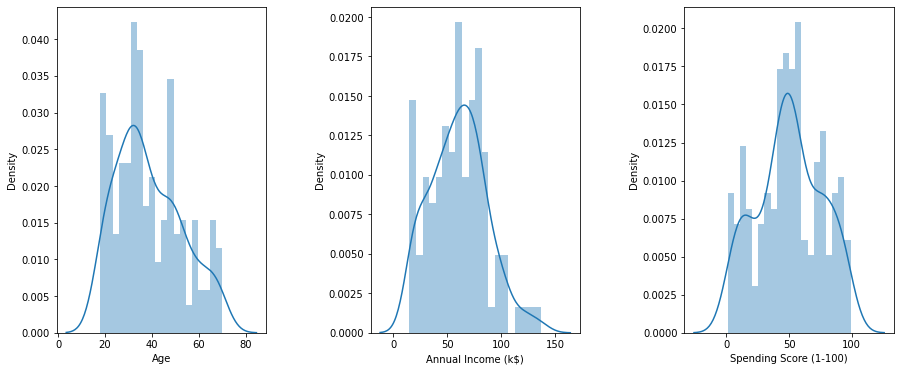

In [11]:
 
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual Income (k$)', "Spending Score (1-100)"]
feature_listt = ['Age','Annual Income (k$)', "Spending Score (1-100)"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data[i], bins=20, kde = True)
    pos = pos + 1
plt.show()

## Gender summary

0    112
1     88
Name: Gender, dtype: int64

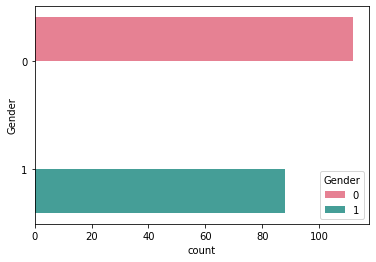

In [12]:

sns.countplot(y = 'Gender', data = data, palette="husl", hue = "Gender")
data["Gender"].value_counts()

## the correlation between three attributes by gender

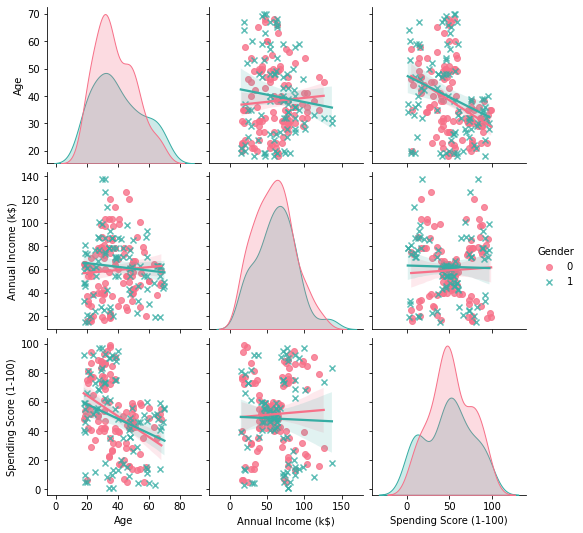

In [13]:
sns.pairplot(data, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','x'])

## Three graphs represent the correlation between two attributes 

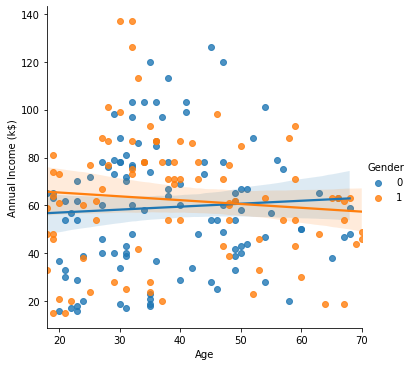

In [14]:
sns.lmplot(x = "Age", y = "Annual Income (k$)", data = data, hue = "Gender")

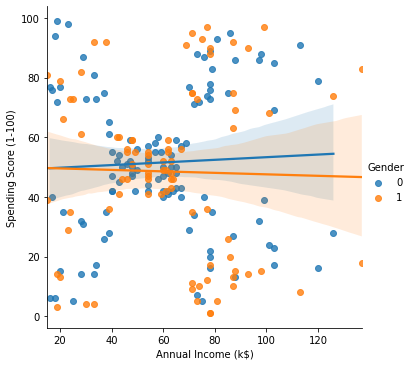

In [15]:
sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = data, hue = "Gender")

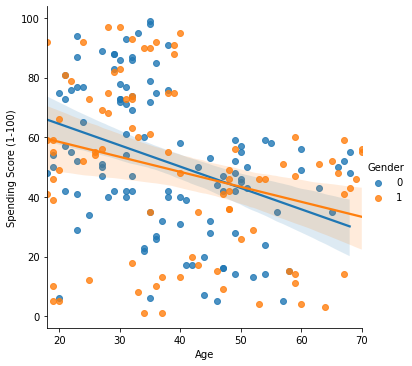

In [16]:
sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = data, hue = "Gender")

## 3D visualization

In [17]:

trace1 = go.Scatter3d(
    x= data['Spending Score (1-100)'],
    y= data['Annual Income (k$)'],
    z= data['Age'],
    mode='markers',
     marker=dict(
        color = 'cornflowerblue', 
        size= 10,
        line=dict(
            color= 'cornflowerblue'
        ),
        opacity = 0.7
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

# Build Models

## K-Means Clustering

In [18]:
import sklearn as sk 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

### Elbow method

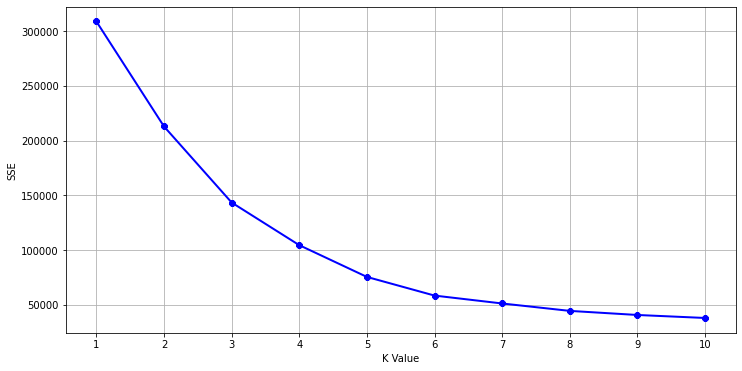

In [19]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data.iloc[:,2:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSE")
plt.show()

### Silhouette method

In [20]:
from sklearn.metrics import silhouette_samples,silhouette_score

cluster =  2 :  0.293166070535953


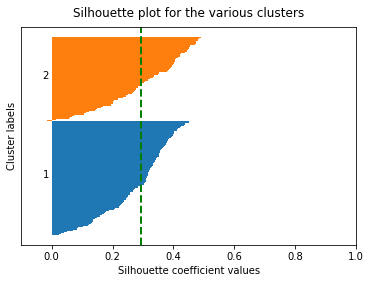

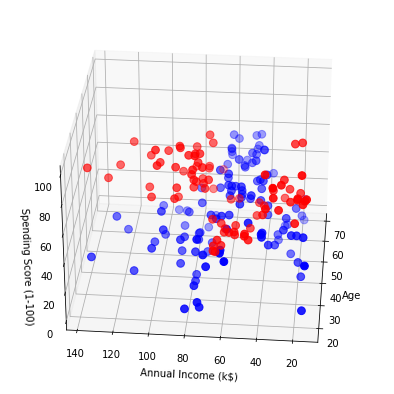

cluster =  3 :  0.38388678055193365


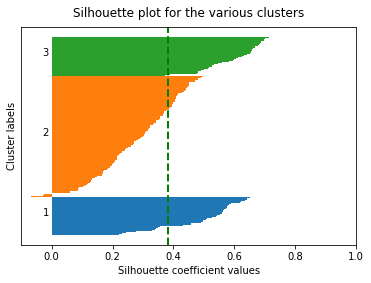

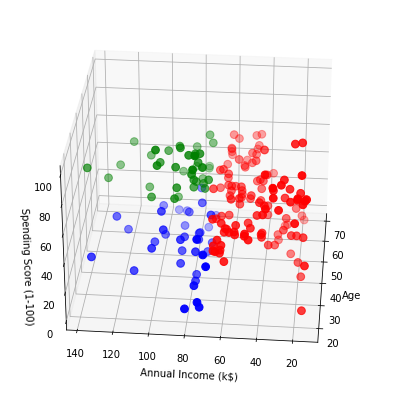

cluster =  4 :  0.4055600141525219


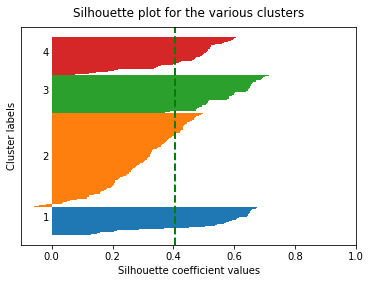

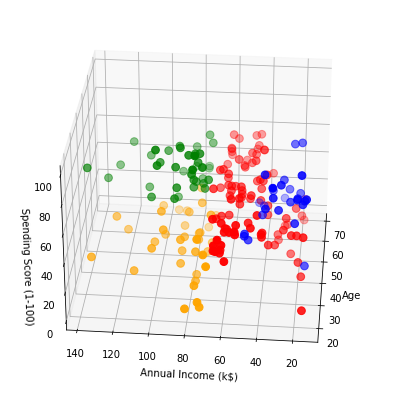

cluster =  5 :  0.44520770467623366


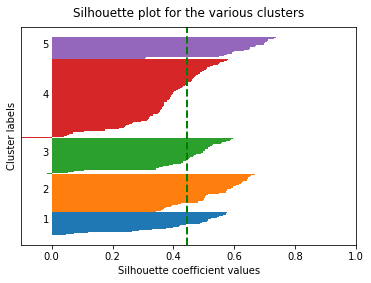

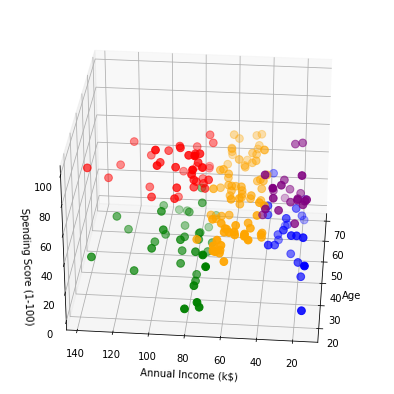

cluster =  6 :  0.45266932539411686


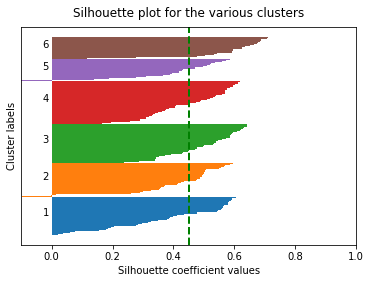

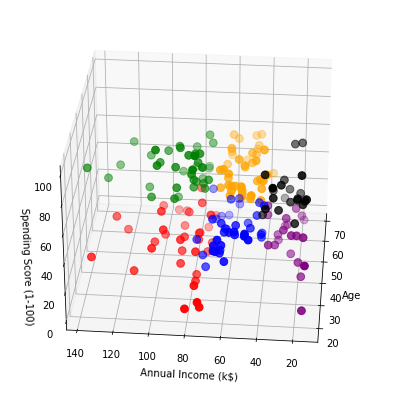

cluster =  7 :  0.44174240576175167


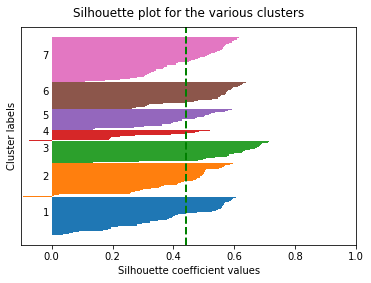

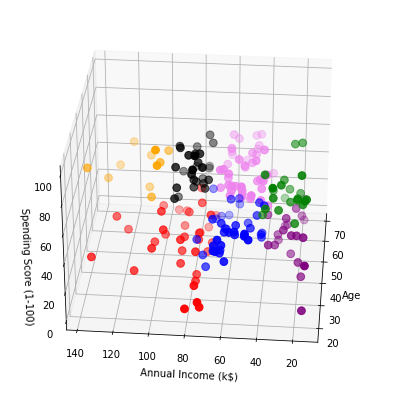

cluster =  8 :  0.4348722216095281


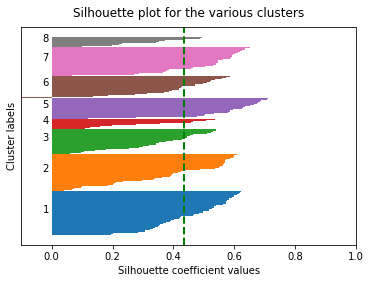

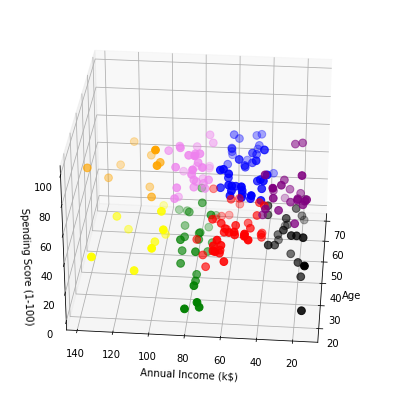

cluster =  9 :  0.41746023950005495


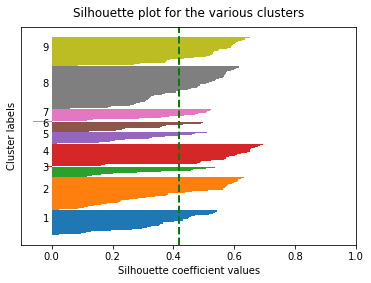

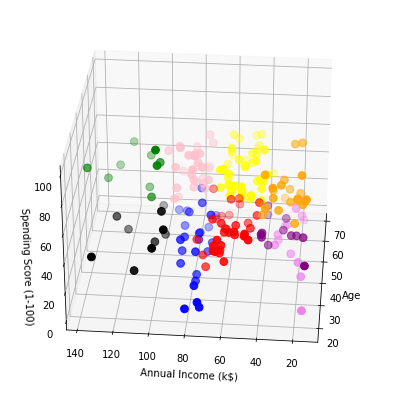

cluster =  10 :  0.38444682922984796


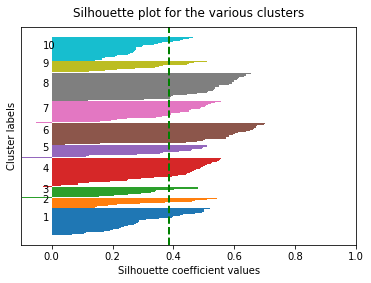

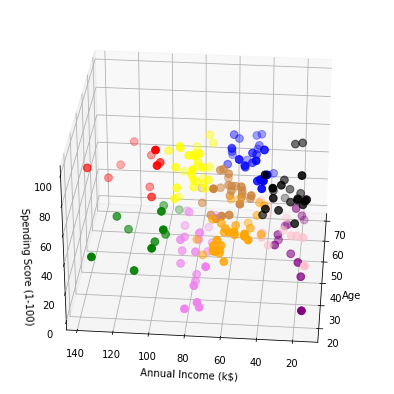

In [21]:
for i,k in enumerate([2,3,4,5,6,7,8,9,10]):
    ax1=plt.axes()
    fig=plt.figure()
    fig.set_size_inches(18,7)

    km=KMeans(n_clusters=k)
    labels=km.fit_predict(data.iloc[:,2:])
    centroids=km.cluster_centers_

    silhouette_vals = sk.metrics.silhouette_samples(data.iloc[:,2:],labels)

    y_tick =[]
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals=silhouette_vals[labels==cluster]
        cluster_silhouette_vals.sort()
        y_upper+=len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)
    
    avg_score = np.mean(silhouette_vals)
    print("cluster = ",k,": ",avg_score)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02)

    data["label"] = labels
    ax2 = fig.add_subplot(111, projection='3d')
    ax2.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
    ax2.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
    ax2.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
    ax2.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
    ax2.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60)
    ax2.scatter(data.Age[data.label == 5], data["Annual Income (k$)"][data.label == 5], data["Spending Score (1-100)"][data.label == 5], c='black', s=60)
    ax2.scatter(data.Age[data.label == 6], data["Annual Income (k$)"][data.label == 6], data["Spending Score (1-100)"][data.label == 6], c='violet', s=60)
    ax2.scatter(data.Age[data.label == 7], data["Annual Income (k$)"][data.label == 7], data["Spending Score (1-100)"][data.label == 7], c='yellow', s=60)
    ax2.scatter(data.Age[data.label == 8], data["Annual Income (k$)"][data.label == 8], data["Spending Score (1-100)"][data.label == 8], c='pink', s=60)
    ax2.scatter(data.Age[data.label == 9], data["Annual Income (k$)"][data.label == 9], data["Spending Score (1-100)"][data.label == 9], c='peru', s=60)
    ax2.view_init(30, 185)
    plt.xlabel("Age")
    plt.ylabel("Annual Income (k$)")
    ax2.set_zlabel('Spending Score (1-100)')
    plt.show()

### build model with k=6

In [22]:
km = KMeans(n_clusters=6)
clusters = km.fit_predict(data.iloc[:,2:])
data["label"] = clusters

In [23]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,5
1,2,1,21,15,81,0
2,3,0,20,16,6,5
3,4,0,23,16,77,0
4,5,0,31,17,40,5
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


In [24]:
trace1 = go.Scatter3d(
    x= data['Spending Score (1-100)'],
    y= data['Annual Income (k$)'],
    z= data['Age'],
    mode='markers',
    marker=dict(
        color = data['label'], 
        size= 10,
        line=dict(
            color=  data['label'],
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

### Test về độ khởi tạo khác nhau

In [25]:
data_test_centroid=data.iloc[:,2:-1]

In [26]:
from sklearn.manifold import TSNE 
tsne=TSNE(n_components=2, verbose =1, perplexity=40,n_iter=300)
data_test_centroid_2d=tsne.fit_transform(data_test_centroid)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 13.156629
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.069511
[t-SNE] KL divergence after 300 iterations: 0.317914


In [27]:
from sklearn.preprocessing import StandardScaler
data_test_centroid=StandardScaler().fit_transform(data_test_centroid)

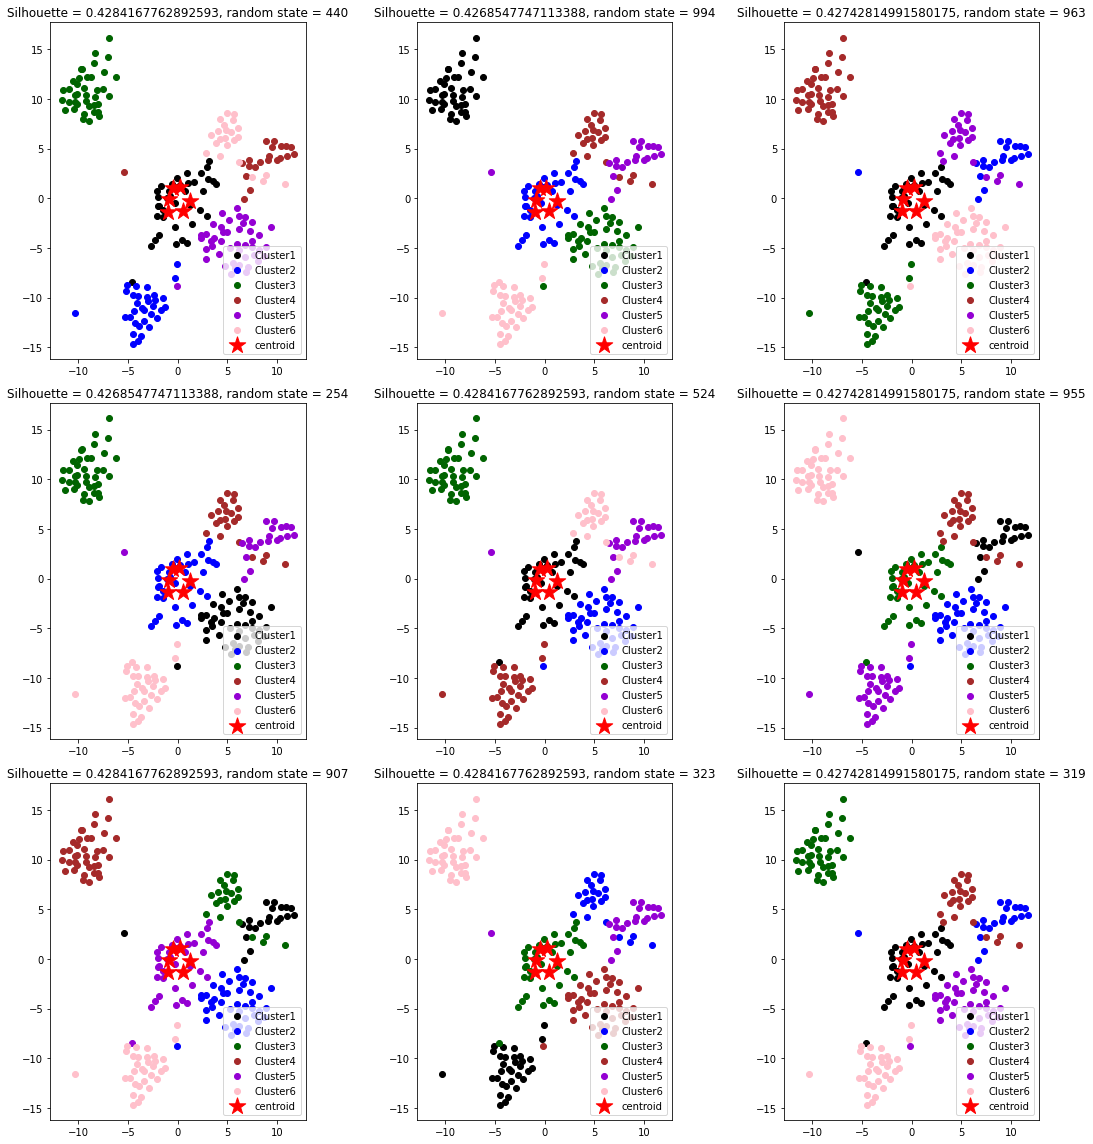

In [28]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    random=int(np.random.randint(0, 1000, size=1,dtype=int))
    km = KMeans(n_clusters=6,random_state=random)
    km.fit(data_test_centroid)
    labels=km.predict(data_test_centroid)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(data_test_centroid_2d[km.labels_==0,0],data_test_centroid_2d[km.labels_==0,1],c='black',label='Cluster1')
    ax[i].scatter(data_test_centroid_2d[km.labels_==1,0],data_test_centroid_2d[km.labels_==1,1],c='blue',label='Cluster2')
    ax[i].scatter(data_test_centroid_2d[km.labels_==2,0],data_test_centroid_2d[km.labels_==2,1],c='darkgreen',label='Cluster3')
    ax[i].scatter(data_test_centroid_2d[km.labels_==3,0],data_test_centroid_2d[km.labels_==3,1],c='brown',label='Cluster4')
    ax[i].scatter(data_test_centroid_2d[km.labels_==4,0],data_test_centroid_2d[km.labels_==4,1],c='darkviolet',label='Cluster5')
    ax[i].scatter(data_test_centroid_2d[km.labels_==5,0],data_test_centroid_2d[km.labels_==5,1],c='pink',label='Cluster6')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],c='r', marker='*', s=300, label='centroid')
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'Silhouette = {silhouette_score(data_test_centroid, labels)}, random state = {random}')
    ax[i].set_aspect('equal')
plt.tight_layout();

### Visualazation kết quả cuối cùng.

In [29]:
data=data.rename(columns={"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Spending_Score"})

Text(0.5, 1.0, 'Tỷ lệ số lượng khách hàng theo từng phân khúc')

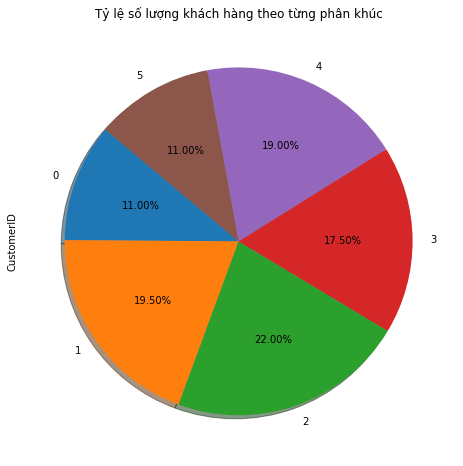

In [49]:
data.groupby(['label']).CustomerID.count().plot.pie(autopct='%.2f%%', figsize=(8,8),shadow= True, startangle= 140,explode=[0,0,0,0,0,0])
plt.title('Tỷ lệ số lượng khách hàng theo từng phân khúc') 

Text(0.5, 1.0, 'Tỷ lệ số điểm mua hàng hàng theo từng phân khúc')

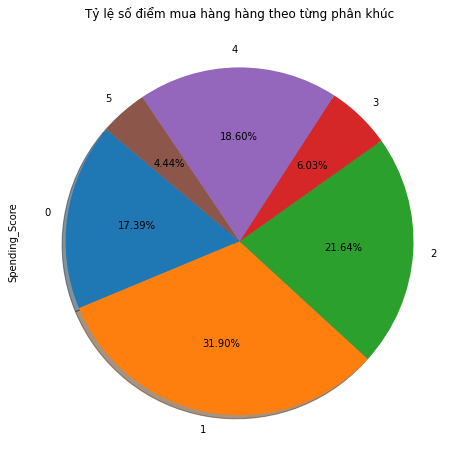

In [50]:
data.groupby(['label']).Spending_Score.sum().plot.pie(autopct='%.2f%%', figsize=(8,8),shadow= True, startangle= 140,explode=[0,0,0,0,0,0])
plt.title('Tỷ lệ số điểm mua hàng hàng theo từng phân khúc') 

Text(0.5, 1.0, 'Tổng điểm mua hàng theo từng phân khúc')

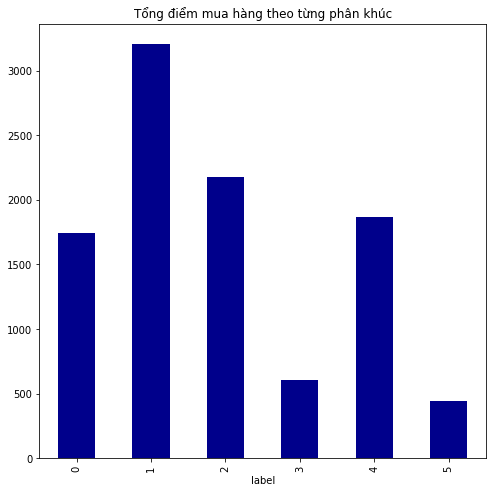

In [48]:
data.groupby(['label']).Spending_Score.sum().plot.bar(figsize=(8,8),color=['darkblue','darkblue','darkblue','darkblue','darkblue','darkblue'])
plt.title('Tổng điểm mua hàng theo từng phân khúc') 

Text(0.5, 1.0, 'Trung bình điểm mua hàng theo từng phân khúc')

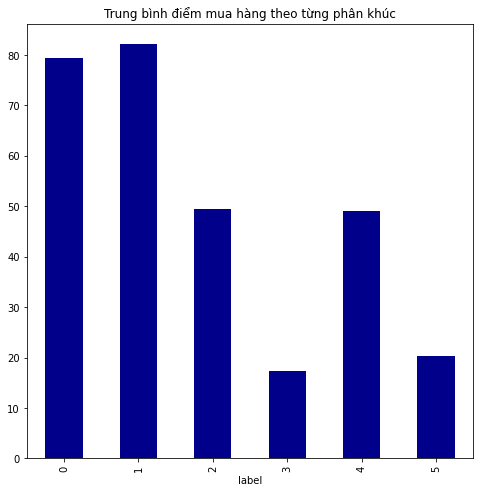

In [47]:
data.groupby(['label']).Spending_Score.mean().plot.bar(figsize=(8,8),color=['darkblue','darkblue','darkblue','darkblue','darkblue'])
plt.title('Trung bình điểm mua hàng theo từng phân khúc') 

## Hierarchical CLustering

In [34]:
data_HAC=data.iloc[:,2:-1]
data_HAC['Spending_Score']=data['Spending_Score'].astype(float)

### Draw Dendogram

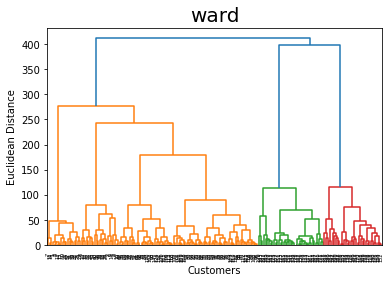

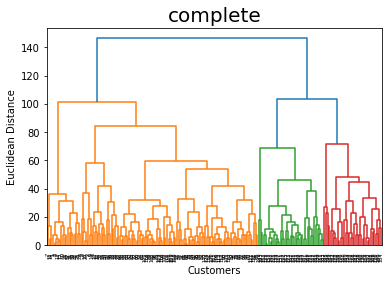

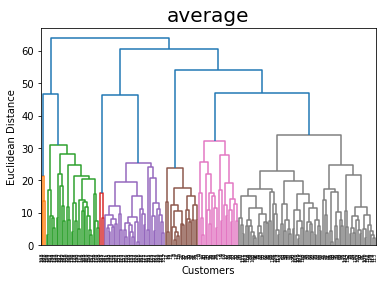

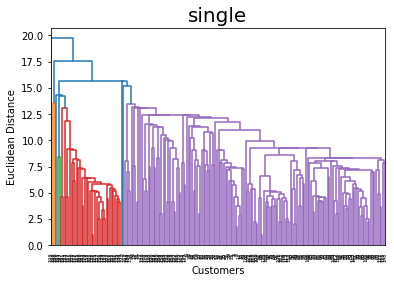

In [35]:
import scipy.cluster.hierarchy as sch
for i in ['ward', 'complete', 'average', 'single']:
    dendogram=sch.dendrogram(sch.linkage(data_HAC,method=i))
    print
    plt.title(i, fontsize=20)
    plt.xlabel("Customers")
    plt.ylabel("Euclidean Distance")
    plt.show()

### Test tham số

In [36]:
from sklearn.cluster import AgglomerativeClustering
affinity=['euclidean', 'l1', 'l2', 'manhattan', 'cosine','precomputed']
linkage_=['ward', 'complete', 'average', 'single']
for i in affinity:
    for j in linkage_:
        if (j=='ward' and i!='euclidean'):
            continue
        hc=AgglomerativeClustering(n_clusters=6, affinity=i, linkage=j)
        if (i=='precomputed'):
            y_hc=hc.fit_predict(distance_matrix_)
        else :
            y_hc=hc.fit_predict(data_HAC)
        silhouette_avg = silhouette_score(data_HAC,y_hc)
        print("Parameters: ",i,j,"\nSilhouette coefficient: ",silhouette_avg)

Parameters:  euclidean ward 
Silhouette coefficient:  0.44308912983504156
Parameters:  euclidean complete 
Silhouette coefficient:  0.4234860790346685
Parameters:  euclidean average 
Silhouette coefficient:  0.4186188585821039
Parameters:  euclidean single 
Silhouette coefficient:  0.16494447557214534
Parameters:  l1 complete 
Silhouette coefficient:  0.4028316615984432
Parameters:  l1 average 
Silhouette coefficient:  0.4272887897574027
Parameters:  l1 single 
Silhouette coefficient:  0.193122910600797
Parameters:  l2 complete 
Silhouette coefficient:  0.4234860790346685
Parameters:  l2 average 
Silhouette coefficient:  0.4186188585821039
Parameters:  l2 single 
Silhouette coefficient:  0.16494447557214534
Parameters:  manhattan complete 
Silhouette coefficient:  0.4028316615984432
Parameters:  manhattan average 
Silhouette coefficient:  0.4272887897574027
Parameters:  manhattan single 
Silhouette coefficient:  0.193122910600797
Parameters:  cosine complete 
Silhouette coefficient:  0

In [37]:
linkage_=['ward', 'complete', 'average',]
k=[6,5,7]
for i in range (0,3):
        hc=AgglomerativeClustering(n_clusters=k[i], affinity='euclidean', linkage=linkage_[i])
        y_hc=hc.fit_predict(data_HAC)
        silhouette_avg = silhouette_score(data_HAC,y_hc)
        print("Parameters: k = ",k[i],",",linkage_[i],"\nSilhouette coefficient: ",silhouette_avg)

Parameters: k =  6 , ward 
Silhouette coefficient:  0.44308912983504156
Parameters: k =  5 , complete 
Silhouette coefficient:  0.4401889024290193
Parameters: k =  7 , average 
Silhouette coefficient:  0.4102108627180583


In [39]:
trace1 = go.Scatter3d(
    x= data_HAC['Spending_Score'],
    y= data_HAC['Annual_Income'],
    z= data_HAC['Age'],
    mode='markers',
     marker=dict(
        color = data_HAC['label'], 
        size= 10,
        line=dict(
            color=  data_HAC['label'],
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

### Visualization kết quả

Text(0.5, 1.0, 'Tỷ lệ số lượng khách hàng theo từng phân khúc')

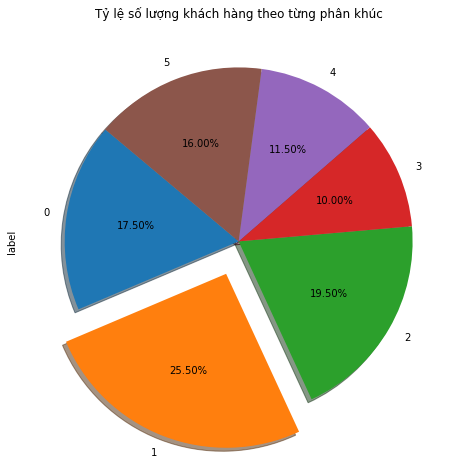

In [41]:
data_HAC.groupby(['label']).label.count().plot.pie(autopct='%.2f%%', figsize=(8,8),shadow= True, startangle= 140)
plt.title('Tỷ lệ số lượng khách hàng theo từng phân khúc') 

Text(0.5, 1.0, 'Tỷ lệ số điểm mua hàng hàng theo từng phân khúc')

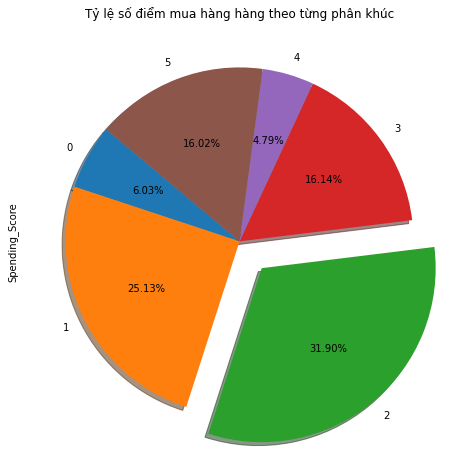

In [42]:
data_HAC.groupby(['label']).Spending_Score.sum().plot.pie(autopct='%.2f%%', figsize=(8,8),shadow= True, startangle= 140)
plt.title('Tỷ lệ số điểm mua hàng hàng theo từng phân khúc') 

Text(0.5, 1.0, 'Tổng điểm mua hàng theo từng phân khúc')

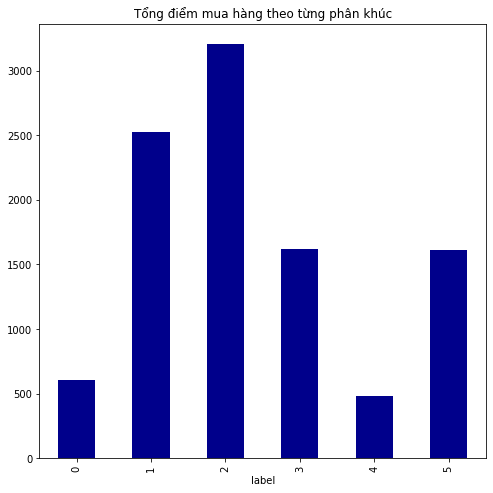

In [45]:
data_HAC.groupby(['label']).Spending_Score.sum().plot.bar(figsize=(8,8),color=['darkblue','darkblue','darkblue','darkblue','darkblue','darkblue'])
plt.title('Tổng điểm mua hàng theo từng phân khúc') 

Text(0.5, 1.0, 'Trung bình điểm mua hàng theo từng phân khúc')

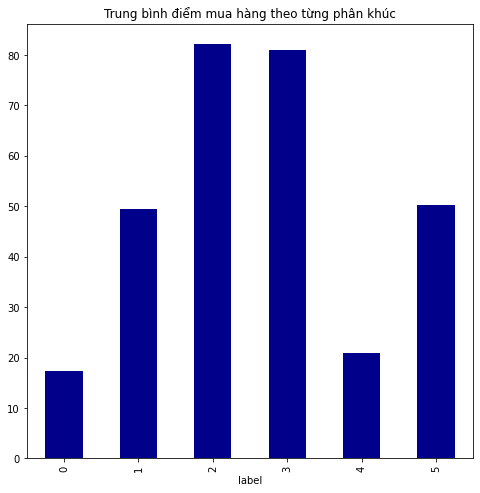

In [46]:
data_HAC.groupby(['label']).Spending_Score.mean().plot.bar(figsize=(8,8),color=['darkblue','darkblue','darkblue','darkblue','darkblue'])
plt.title('Trung bình điểm mua hàng theo từng phân khúc') 